In [3]:
import librosa
import librosa.display

# Compute local onset autocorrelation
y, sr = librosa.load('C:/nmb/nmb_data/testvoice_M2.wav', duration=30)
print(y)
print(len(y))   # 110250
print(y.shape)  # (110250,)

hop_length = 512

oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
print(len(oenv))    # 216
print(oenv.shape)   # (216,)

tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
print(len(tempogram))       # 384
print(tempogram.shape)      # (384, 216)
print(tempogram.shape[0])   # 384

# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
print(ac_global.shape)  # (216,)
ac_global = librosa.util.normalize(ac_global)
print(ac_global.shape)  # (216,)

# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr, hop_length=hop_length)[0]
print(tempo)    # 112.34714673913044

[-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
110250
(110250,)
216
(216,)
384
(384, 216)
384
(216,)
(216,)
112.34714673913044


C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
<ipython-input-10-a2c4e85621f6>:26: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),


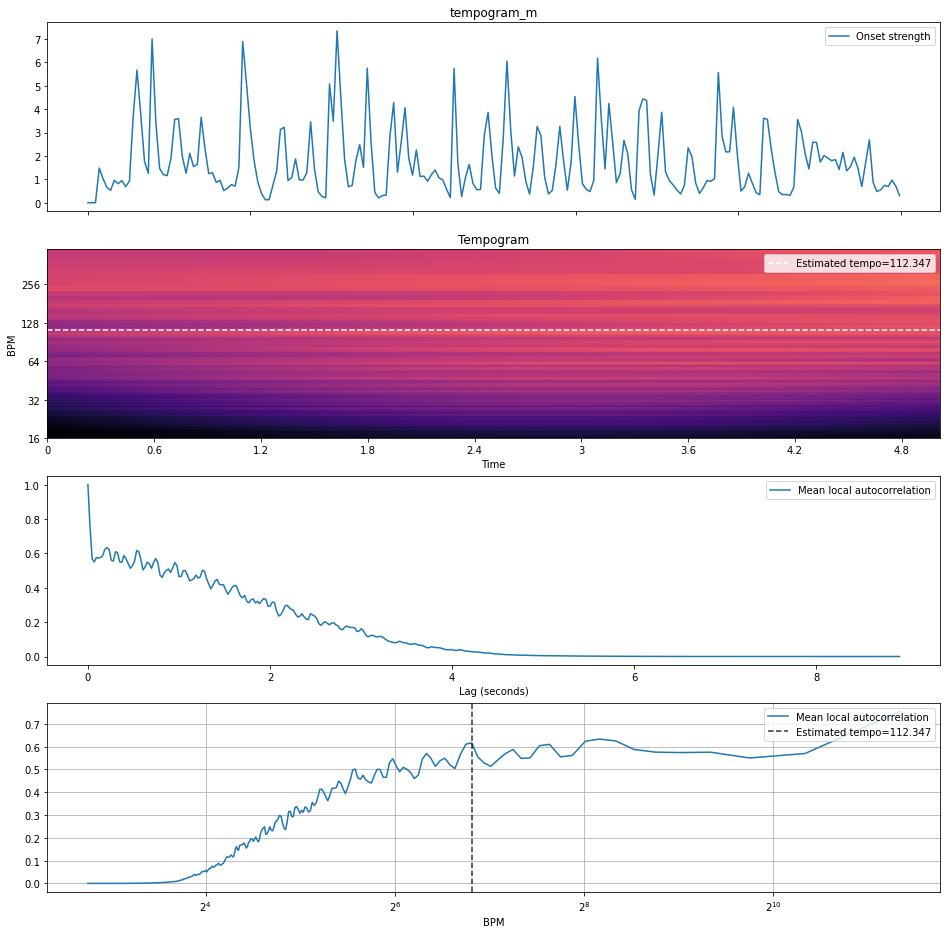

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, figsize=(16, 16))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].set_title('tempogram_m')
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')

x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
# ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].legend(loc='upper right')
ax[2].set(xlabel='Lag (seconds)')

freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
# ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
#              label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(loc='upper right')
ax[3].set(xlabel='BPM')
ax[3].grid(True)